In [1]:
from repositorio_de_banco import FaixaReceber, ConsultaExecutor
from conexao_banco_dados_resulth import ConexaoBancoDadosResulth
from matplotlib import pyplot as plt
from contas_a_receber import calcular_dados_inadimplencia, criar_regras_de_negocio

In [2]:
faixa_1_a_30_dias_atraso = FaixaReceber(faixa_1_a_30_dias=True)
faixa_31_a_60_dias_atraso = FaixaReceber(faixa_31_a_60_dias=True)
faixa_61_a_90_dias_atraso = FaixaReceber(faixa_61_a_90_dias=True)
faixa_91_a_120_dias_atraso = FaixaReceber(faixa_91_a_120_dias=True)
faixa_acima_de_120_dias_atraso = FaixaReceber(faixa_120_acima_dias=True)

In [3]:
repositorio = ConsultaExecutor(
    data_inicial="2000-12-31",
    data_final="2100-12-31",
    conexao_banco=ConexaoBancoDadosResulth()
)

In [4]:
consulta1 = faixa_1_a_30_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta2 = faixa_31_a_60_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta3 = faixa_61_a_90_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta4 = faixa_91_a_120_dias_atraso.acessar_faixa_clientes_em_atraso()
consulta5 = faixa_acima_de_120_dias_atraso.acessar_faixa_clientes_em_atraso()

In [5]:
resultado1 = repositorio.consultar_clientes_faixa_atraso_dias(consulta1)
resultado2 = repositorio.consultar_clientes_faixa_atraso_dias(consulta2)
resultado3 = repositorio.consultar_clientes_faixa_atraso_dias(consulta3)
resultado4 = repositorio.consultar_clientes_faixa_atraso_dias(consulta4)
resultado5 = repositorio.consultar_clientes_faixa_atraso_dias(consulta5)

In [6]:
def calcular_total(resultado):
    total = []
    for valor in resultado:
        total.append(valor[2])
    return sum(total)

In [27]:
total1 = calcular_total(resultado1)
total2 = calcular_total(resultado2)
total3 = calcular_total(resultado3)
total4 = calcular_total(resultado4)
total5 = calcular_total(resultado5)

regras = criar_regras_de_negocio(repositorio)
dados_inadimplencia = calcular_dados_inadimplencia(regras)
saldo_total = dados_inadimplencia["saldo_contas_a_receber"]

perc1 = total1 / saldo_total
perc2 = total2 / saldo_total
perc3 = total3 / saldo_total
perc4 = total4 / saldo_total
perc5 = total5 / saldo_total

In [28]:
categories = ['<30 dias', 'De 31 a 60 dias', 'De 61 a 90 dias', 'De 91 a 120 dias', '>120 dias']
dados = [perc1, perc2, perc3, perc4, perc5]
cores = ['#ff9999','#66b3ff','#99ff99','#17becf', '#ffcc99']

In [32]:
# Verificação dos dados antes de plotar
print(f"Saldo total: {saldo_total}")
print(f"Percentuais: {dados}")
print(f"Soma dos percentuais: {sum(dados):.2%}")

Saldo total: 613754.0299999999
Percentuais: [0.09111609417864028, 0.020629159860669266, 0.026637706965443472, 0.0020132820960866034, 0.018883297597247554]
Soma dos percentuais: 15.93%


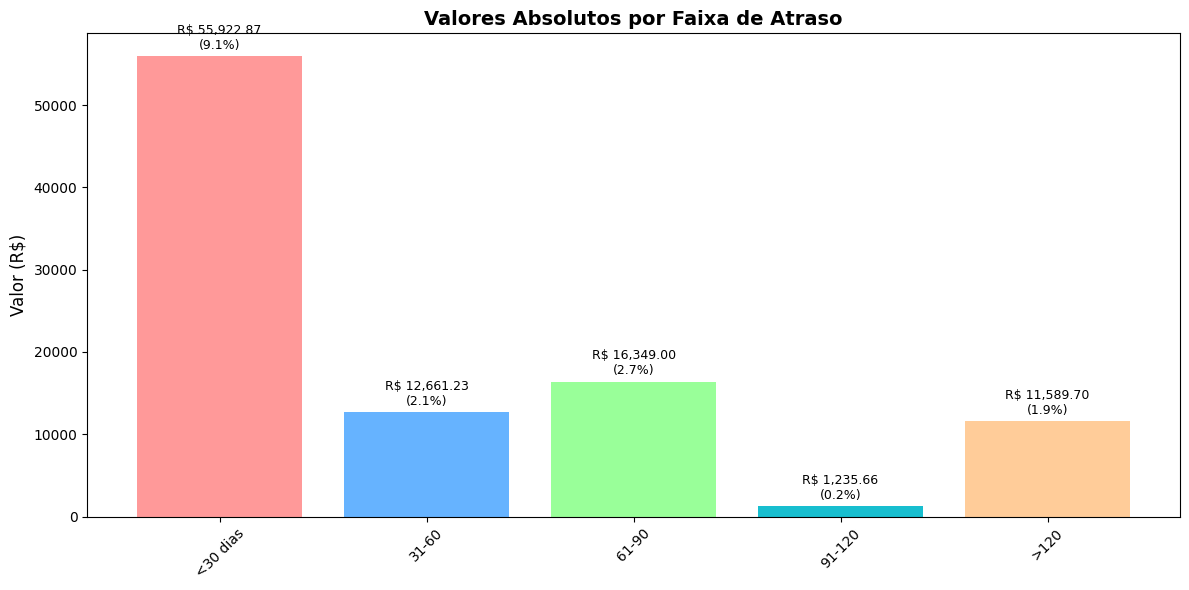

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))

categorias = ['<30 dias', '31-60', '61-90', '91-120', '>120']
valores = [total1, total2, total3, total4, total5]

bars = ax.bar(categorias, valores, color=cores)
ax.set_title('Valores Absolutos por Faixa de Atraso', fontsize=14, fontweight='bold')
ax.set_ylabel('Valor (R$)', fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + max(valores)*0.01,
            f'R$ {height:,.2f}\n({height/saldo_total:.1%})',
            ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()